In [58]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad


In [59]:
def temperatura_mitjana(x):
    return max(min((x - 20) / (25 - 20), (30 - x) / (30 - 25)), 0)

def potencia_mitjana(y):
    return max(min((y - 25) / (50 - 25), (75 - y) / (75 - 50)), 0)


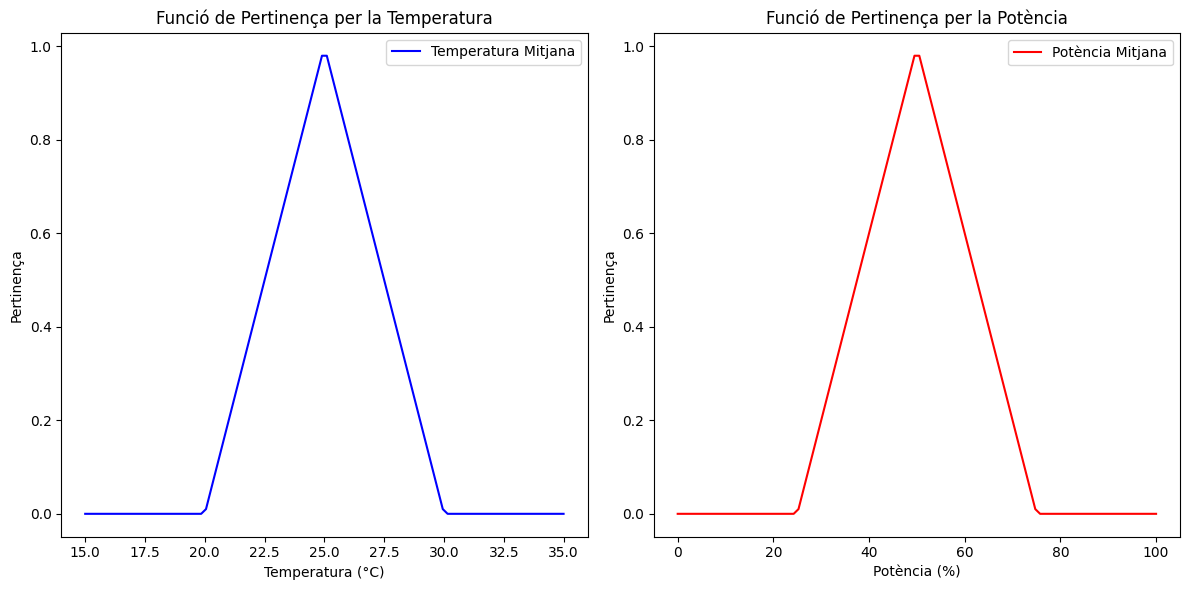

In [60]:
temperatures = np.linspace(15, 35, 100)
potencies = np.linspace(0, 100, 100)

pertinenca_temperatura = [temperatura_mitjana(x) for x in temperatures]
pertinenca_potencia = [potencia_mitjana(y) for y in potencies]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(temperatures, pertinenca_temperatura, label="Temperatura Mitjana", color="blue")
plt.title("Funció de Pertinença per la Temperatura")
plt.xlabel("Temperatura (°C)")
plt.ylabel("Pertinença")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(potencies, pertinenca_potencia, label="Potència Mitjana", color="red")
plt.title("Funció de Pertinença per la Potència")
plt.xlabel("Potència (%)")
plt.ylabel("Pertinença")
plt.legend()

plt.tight_layout()
plt.show()


In [61]:
temperatura_actual = 23
pertinenca_temp_actual = temperatura_mitjana(temperatura_actual)

pertinenca_temp_actual


0.6

In [62]:
def ponderada_potencia(y):
    return potencia_mitjana(y) * pertinenca_temp_actual

integral_ponderada, _ = quad(ponderada_potencia, 0, 100)
integral_no_ponderada, _ = quad(potencia_mitjana, 0, 100)

potencia_defuzzificada = integral_ponderada / integral_no_ponderada if integral_no_ponderada != 0 else 0

potencia_defuzzificada

0.6

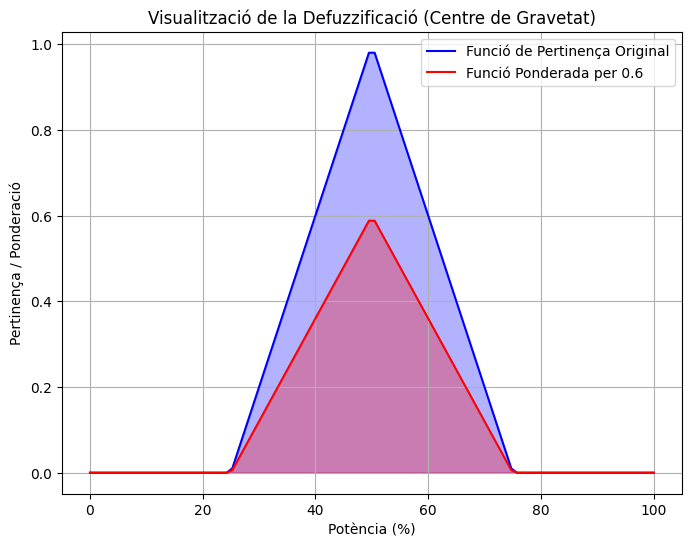

In [63]:
# Valors de pertinença i funcions ponderades per a la visualització
pertinenca_temp_actual = temperatura_mitjana(23)
funcio_ponderada = [potencia_mitjana(y) * pertinenca_temp_actual for y in potencies]

# Creació de la visualització
plt.figure(figsize=(8, 6))

plt.plot(potencies, pertinenca_potencia, label="Funció de Pertinença Original", color="blue")
plt.fill_between(potencies, pertinenca_potencia, color="blue", alpha=0.3)
plt.plot(potencies, funcio_ponderada, label="Funció Ponderada per 0.6", color="red")
plt.fill_between(potencies, funcio_ponderada, color="red", alpha=0.3)

plt.title("Visualització de la Defuzzificació (Centre de Gravetat)")
plt.xlabel("Potència (%)")
plt.ylabel("Pertinença / Ponderació")
plt.legend()
plt.grid(True)
plt.show()



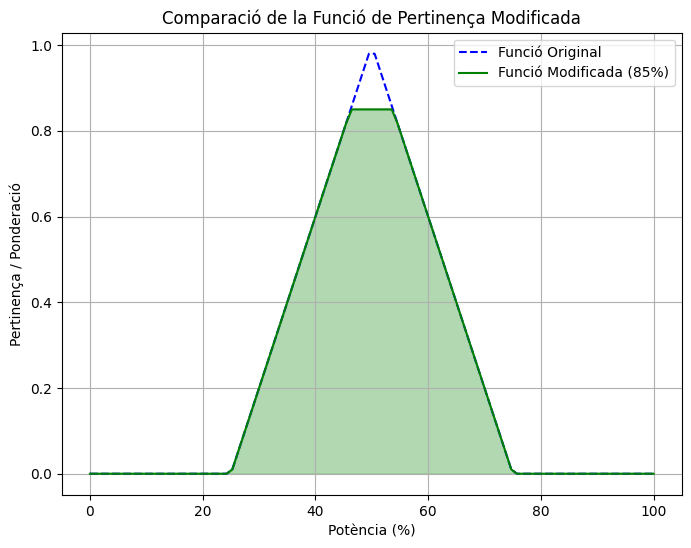

In [64]:
# Modificació de la funció de pertinença de la potència
def potencia_mitjana_modificada(y):
    return min(potencia_mitjana(y), 0.85)

# Funció modificada per a la visualització
funcio_modificada = [potencia_mitjana_modificada(y) for y in potencies]

# Creació de la visualització comparativa
plt.figure(figsize=(8, 6))

plt.plot(potencies, pertinenca_potencia, label="Funció Original", color="blue", linestyle='--')
plt.plot(potencies, funcio_modificada, label="Funció Modificada (85%)", color="green")
plt.fill_between(potencies, funcio_modificada, color="green", alpha=0.3)

plt.title("Comparació de la Funció de Pertinença Modificada")
plt.xlabel("Potència (%)")
plt.ylabel("Pertinença / Ponderació")
plt.legend()
plt.grid(True)
plt.show()


In [65]:
# Càlcul de la integral ponderada per a la funció modificada
def ponderada_potencia_modificada(y):
    return potencia_mitjana_modificada(y) * pertinenca_temp_actual

integral_ponderada_modificada, _ = quad(ponderada_potencia_modificada, 0, 100)

# Càlcul de la integral no ponderada per a la funció modificada
integral_no_ponderada_modificada, _ = quad(potencia_mitjana_modificada, 0, 100)

# Càlcul de la potència defuzzificada per a la funció modificada
potencia_defuzzificada_modificada = integral_ponderada_modificada / integral_no_ponderada_modificada if integral_no_ponderada_modificada != 0 else 0

integral_ponderada_modificada, integral_no_ponderada_modificada, potencia_defuzzificada_modificada



(14.662500000000003, 24.437500000000004, 0.6000000000000001)